In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
from numpy import linalg as LA
%matplotlib inline

In [2]:
# Read test dataset
path_to_data = 'data/'
X_test = pd.read_csv(path_to_data + 'Xte.csv',header = None, usecols=range(3072))
Y_train = pd.read_csv(path_to_data + 'Ytr.csv')
X_train = pd.read_csv(path_to_data + 'Xtr.csv',header = None, usecols=range(3072))

In [38]:
image = np.zeros((32, 32 ,3), 'uint8')
color_channel = np.zeros(1024)
imageid = 1
for k in range(3):
    color_channel =  X_test.values[imageid,k*1024:(k+1)*1024]
    color_channel = color_channel.reshape((32,32))
    #image[:,:,k] = (color_channel - color_channel.min()) / (color_channel.max() + color_channel.min()) * 256
    image[:,:,k] = color_channel / color_channel.max() * 256


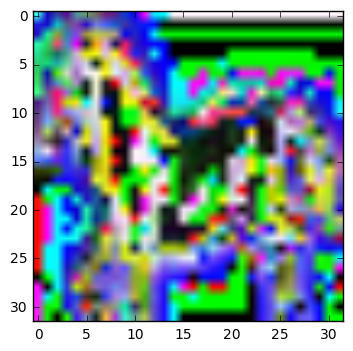

In [39]:
plt.imshow(image)
plt.show()

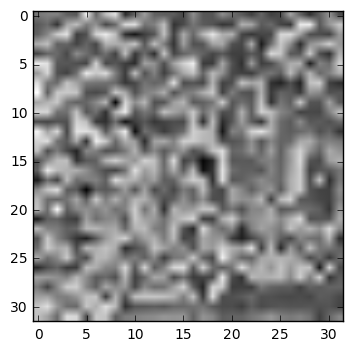

In [21]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    
gray = rgb2gray(image_reshaped_1)    
plt.imshow(gray, cmap = plt.get_cmap('gray'))
plt.show()

In [49]:
from skimage.feature import hog
HOG = np.zeros((5000,324))
for i in range(len(X_train)):
    im = X_train.ix[i].values.reshape(3,32,32).transpose(1,2,0)
    imGray = rgb2gray(im)
    HOG[i,:] = hog(imGray, cells_per_block=(2,2))

In [50]:
X_train.ix[0].values.reshape(3,32,32)

array([[[  7.01830600e-03,   3.23271000e-04,   2.21460900e-03, ...,
           7.66349300e-03,  -4.40182600e-03,  -1.12776700e-02],
        [  1.34035000e-02,   2.73685300e-03,   5.30237500e-03, ...,
           6.61243200e-03,  -2.63888600e-03,  -5.38102300e-03],
        [  4.31503400e-03,  -7.08838500e-04,   2.65160400e-04, ...,
           8.95602200e-03,  -5.17297600e-03,  -1.00982700e-02],
        ..., 
        [  1.05088000e-02,  -8.67661200e-03,  -7.02333700e-03, ...,
          -1.68663500e-04,   9.82023600e-03,   2.37704100e-02],
        [  1.09518200e-02,   9.17235300e-03,  -6.42339300e-03, ...,
           1.36246000e-03,   5.21311700e-03,   1.13014300e-02],
        [  4.07238200e-03,  -6.28605600e-03,  -4.97945100e-03, ...,
          -3.17323700e-03,  -4.11239700e-03,  -4.11780600e-03]],

       [[  4.95037800e-03,  -1.77140900e-03,  -2.58023700e-03, ...,
          -1.47518300e-02,  -3.98288200e-03,   1.17502400e-02],
        [  9.19505300e-03,   1.33411200e-03,  -2.86515500e-0

In [41]:
X_train.ix[0]

0       0.007018
1       0.000819
2      -0.016779
3       0.014936
4      -0.073091
5       0.090871
6       0.015594
7      -0.004467
8      -0.013473
9      -0.007625
10     -0.002706
11      0.000099
12     -0.035367
13     -0.003968
14      0.022639
15     -0.000240
16      0.083017
17      0.003970
18      0.110621
19      0.019953
20      0.039674
21     -0.026436
22     -0.008455
23     -0.113470
24      0.040529
25     -0.007140
26      0.008316
27      0.071129
28      0.035515
29     -0.004639
          ...   
4970   -0.051280
4971   -0.000971
4972   -0.016819
4973    0.008230
4974    0.010335
4975   -0.001927
4976   -0.010073
4977    0.055762
4978   -0.012194
4979    0.023755
4980    0.004065
4981    0.097978
4982    0.099845
4983    0.010344
4984    0.033036
4985   -0.009941
4986    0.001686
4987    0.002904
4988   -0.016905
4989   -0.004675
4990    0.006874
4991    0.001868
4992   -0.008542
4993    0.006021
4994    0.011029
4995   -0.021390
4996   -0.028515
4997    0.0496

In [42]:
X_train.ix[0]

0       0.007018
1       0.000323
2       0.002215
3       0.000781
4      -0.005636
5      -0.001525
6      -0.001090
7      -0.001907
8       0.004179
9      -0.004225
10     -0.002190
11     -0.000772
12     -0.000229
13     -0.000400
14     -0.002581
15     -0.000708
16     -0.003941
17     -0.002583
18     -0.004377
19     -0.003760
20     -0.003689
21     -0.004864
22      0.002178
23     -0.000712
24     -0.001066
25     -0.008169
26     -0.004594
27     -0.004416
28     -0.006591
29      0.007663
          ...   
3042    0.002081
3043    0.000548
3044   -0.008754
3045   -0.010020
3046   -0.019772
3047   -0.003236
3048   -0.008306
3049   -0.004669
3050   -0.010607
3051   -0.000498
3052   -0.005438
3053   -0.007877
3054   -0.006283
3055    0.001090
3056   -0.003889
3057   -0.005477
3058   -0.004817
3059   -0.004038
3060   -0.000829
3061    0.009573
3062    0.004146
3063   -0.002166
3064   -0.005094
3065    0.001906
3066   -0.006143
3067   -0.013265
3068   -0.013873
3069    0.0052

In [43]:
X_train

,0,1,2,3,4,5,6,7,8,9,...,3062,3063,3064,3065,3066,3067,3068,3069,3070,3071
0,0.007018,0.000323,0.002215,0.000781,-0.005636,-0.001525,-0.001090,-0.001907,0.004179,-0.004225,...,0.004146,-0.002166,-0.005094,0.001906,-0.006143,-0.013265,-0.013873,0.005223,-0.000860,-0.012881
1,0.000819,0.001688,0.002698,0.004685,0.011166,0.017482,0.045989,0.031377,0.032150,0.062066,...,-0.000530,0.007203,0.008634,0.006800,0.014114,0.000243,-0.019384,-0.046763,-0.048919,-0.057449
2,-0.016779,0.006662,-0.007226,-0.003798,-0.004273,-0.009955,-0.030925,-0.007064,0.008136,0.000618,...,-0.029953,-0.023748,0.047707,0.072310,0.056837,0.045410,0.015561,0.003272,-0.013745,0.000968
3,0.014936,0.004218,0.009732,0.007309,0.004914,0.008172,0.014205,-0.023263,-0.023014,0.011482,...,-0.004505,-0.029634,-0.024069,-0.000788,-0.005010,-0.004260,0.014308,-0.010997,-0.025966,-0.025786
4,-0.073091,-0.046800,-0.056235,-0.063619,-0.088387,-0.044682,-0.014172,-0.077535,-0.100056,-0.066161,...,0.011063,-0.018166,0.012983,0.022676,0.014233,0.047403,0.052239,-0.029272,0.001368,-0.001475
5,0.090871,0.002578,-0.033329,0.034625,0.089689,0.023049,0.006742,0.022115,0.038332,-0.049645,...,0.012468,0.000460,0.059476,0.006270,-0.023520,0.008672,0.002063,0.008225,0.030699,-0.009958
6,0.015594,0.018779,0.016752,0.012872,0.021406,0.020604,0.025929,0.021840,0.021548,0.024263,...,0.002241,-0.003220,-0.006568,-0.016055,0.003504,0.004922,0.005114,0.003789,0.003596,0.004318
7,-0.004467,0.003506,-0.002526,0.005122,0.002207,-0.000329,0.001463,0.001069,0.000305,0.000159,...,-0.003828,-0.008810,-0.008098,-0.006436,-0.008143,-0.003654,-0.011424,-0.033884,0.032471,0.073802
8,-0.013473,-0.012492,-0.002369,0.009874,0.009026,0.011701,0.003378,-0.026349,0.025112,0.015472,...,0.031505,0.043816,-0.001267,-0.010348,0.011040,0.034485,0.008271,-0.008639,0.022034,0.022983
9,-0.007625,0.016939,-0.004255,-0.010220,0.003656,-0.008671,-0.016204,-0.010183,-0.007723,-0.002609,...,0.037618,0.028637,0.035471,0.023627,0.035861,0.037865,-0.005042,-0.011625,0.039127,0.091335


In [45]:
X_train.iloc[0]

0       0.007018
1       0.000323
2       0.002215
3       0.000781
4      -0.005636
5      -0.001525
6      -0.001090
7      -0.001907
8       0.004179
9      -0.004225
10     -0.002190
11     -0.000772
12     -0.000229
13     -0.000400
14     -0.002581
15     -0.000708
16     -0.003941
17     -0.002583
18     -0.004377
19     -0.003760
20     -0.003689
21     -0.004864
22      0.002178
23     -0.000712
24     -0.001066
25     -0.008169
26     -0.004594
27     -0.004416
28     -0.006591
29      0.007663
          ...   
3042    0.002081
3043    0.000548
3044   -0.008754
3045   -0.010020
3046   -0.019772
3047   -0.003236
3048   -0.008306
3049   -0.004669
3050   -0.010607
3051   -0.000498
3052   -0.005438
3053   -0.007877
3054   -0.006283
3055    0.001090
3056   -0.003889
3057   -0.005477
3058   -0.004817
3059   -0.004038
3060   -0.000829
3061    0.009573
3062    0.004146
3063   -0.002166
3064   -0.005094
3065    0.001906
3066   -0.006143
3067   -0.013265
3068   -0.013873
3069    0.0052